# Modelo SIR

Tomar distribuciones aleatorias de los parámetros en el modelo SIR

SIR depende de $\beta$ y $\gamma$ la tasa de infección y de recuperación, respectivamente.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
def SIR(b,g,t):
    N = 1
    I0, R0 = 0.01, 0
    S0 = N - I0 - R0
    
    y0  = S0, I0, R0
    ret = odeint(deriv,y0,t,args=(N,b,g))
    
    S, I, R = ret.T
    
    return S, I, R

In [4]:
# True parameters
beta_true  = 0.18
gamma_true = 0.12
f_true   = 0.3

# Generate some synthetic data from the model
N = 160
T  = np.sort(160*np.random.rand(N))
T0 = np.linspace(0,160,N)
y_err = 0.001 + 0.005 * np.random.rand(N), 0.001 + 0.005 * np.random.rand(N), 0.001 + 0.005 * np.random.rand(N)

y = SIR(beta_true,gamma_true,T0)
y_tot = y + y_err * np.random.randn(N)

Text(0.5, 0, 'Time')

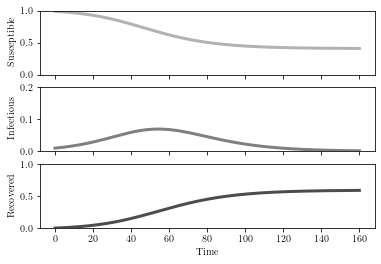

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(3,sharex=True)

ax1.set_ylim(0.0,1.0)
ax1.plot(T0,y[0],"k",alpha=0.3,lw=3)
ax1.set_ylabel(r"Susceptible")

ax2.set_ylim(0.0,0.2)
ax2.plot(T0,y[1],"k",alpha=0.5,lw=3)
ax2.set_ylabel(r"Infectious")

ax3.set_ylim(0.0,1.0)
ax3.plot(T0,y[2],"k",alpha=0.7,lw=3)
ax3.set_ylabel(r"Recovered")


plt.xlabel(r"Time")